In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Get the data

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Dealing with the data

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
df.duplicated().sum().sum()

0

In [9]:
df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [11]:
df.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [13]:
df1 = df.drop(['customer','state','education','effective_to_date','marital_status','employmentstatus'],axis = 1)

In [14]:
df1.head()

,customer_lifetime_value,response,coverage,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,2763.519279,No,Basic,F,56274,Suburban,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,F,0,Suburban,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,F,48767,Suburban,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,M,0,Suburban,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,M,43836,Rural,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
df1['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [16]:
df1.shape

(9134, 18)

## Explore the data

Text(0.5, 1.0, 'Total number of responses')

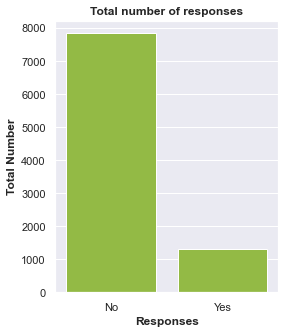

In [17]:
# plot of the total number of responses

a = df['response'].value_counts()
plt.figure(figsize = (4,5))
sns.set(style='darkgrid')
plot1 = sns.barplot(data = df, x = a.index, y= a,color="yellowgreen")
plt.xlabel("Responses", weight = 'bold',size = 12)
plt.ylabel("Total Number", weight = 'bold',size = 12)
plt.title("Total number of responses",weight = 'bold',size = 12)

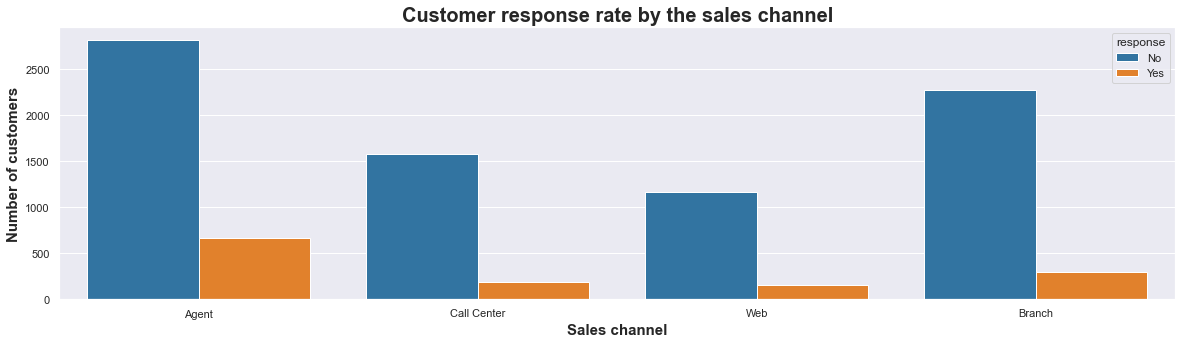

In [18]:
# Customer response rate by the sales channel

plt.figure(figsize=(20, 5))
sns.set(style='darkgrid')
color = ['green','red']
plot2 = sns.countplot(data = df,x='sales_channel', hue = 'response', palette='tab10')
plt.title('Customer response rate by the sales channel',weight='bold',size = 20)
plt.xlabel('Sales channel', weight='bold',size = 15)
plt.ylabel('Number of customers', weight='bold',size = 15)
plt.show()

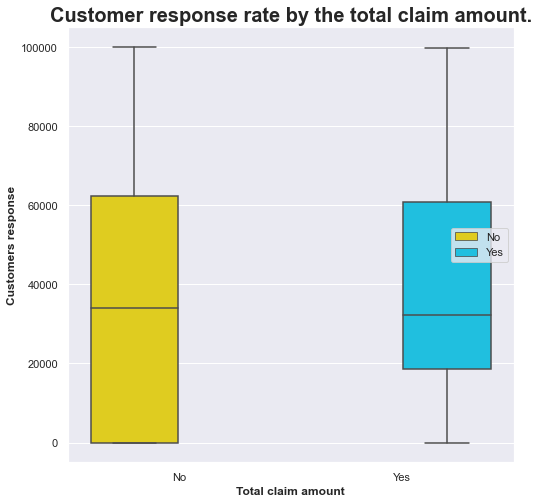

In [19]:
# plot of the response rate by income
plt.figure(figsize=(8,8))
plot5 = sns.boxplot(data=df, y = 'income', x = 'response', hue = 'response',palette='jet_r')
plt.title('Customer response rate by the total claim amount.', weight ='bold',fontsize = 20)
plt.xlabel('Total claim amount', weight='bold',fontsize = 12)
plt.ylabel('Customers response', weight='bold',fontsize = 12)
plt.legend(markerscale=2)

## Processing Data

In [20]:
df1.head(2)

,customer_lifetime_value,response,coverage,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,2763.519279,No,Basic,F,56274,Suburban,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,F,0,Suburban,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [21]:
df1.shape

(9134, 18)

### x-y split

In [22]:
x = df1.drop('total_claim_amount',axis=1)
y = df1['total_claim_amount']

In [23]:
x.shape

(9134, 17)

In [24]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [25]:
catCols = x[x.select_dtypes("object").columns]
catCols

,response,coverage,gender,location_code,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,No,Basic,F,Suburban,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,No,Extended,F,Suburban,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,No,Premium,F,Suburban,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,No,Basic,M,Suburban,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,No,Basic,M,Rural,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...
9129,No,Basic,M,Urban,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,Yes,Extended,F,Suburban,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,No,Extended,M,Suburban,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,No,Extended,M,Suburban,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
catCols['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [27]:
numCols = x[x.select_dtypes("number").columns]
numCols

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


### Normalize (numerical)

In [28]:
transformer = MinMaxScaler().fit(numCols) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(numCols) #This is a an array of arrays
print(x_minmax.shape)

(9134, 7)


In [29]:
x_min = numCols.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_min)
minmax_df = pd.DataFrame(x_scaled,columns=numCols.columns)

In [30]:
x_min

array([[2.76351928e+03, 5.62740000e+04, 6.90000000e+01, ...,
        5.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.97953590e+03, 0.00000000e+00, 9.40000000e+01, ...,
        4.20000000e+01, 0.00000000e+00, 8.00000000e+00],
       [1.28874317e+04, 4.87670000e+04, 1.08000000e+02, ...,
        3.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [8.16389043e+03, 0.00000000e+00, 8.50000000e+01, ...,
        3.70000000e+01, 3.00000000e+00, 2.00000000e+00],
       [7.52444244e+03, 2.19410000e+04, 9.60000000e+01, ...,
        3.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [2.61183687e+03, 0.00000000e+00, 7.70000000e+01, ...,
        9.00000000e+01, 0.00000000e+00, 1.00000000e+00]])

In [31]:
minmax_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


### One Hot/Label Encoding (categorical).

In [32]:
x_dum = pd.get_dummies(catCols, drop_first=True) 
x_dum

,response_Yes,coverage_Extended,coverage_Premium,gender_M,location_code_Suburban,location_code_Urban,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
9131,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Concat DataFrames

In [33]:
concat_df = pd.concat([minmax_df, x_dum], axis=1)

In [34]:
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_Yes,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
concat_df.shape

(9134, 36)

## Linear Regression

### Train-test split.

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(concat_df,y,test_size = 0.3,random_state=22)

In [37]:
xtrain.shape

(6393, 36)

In [38]:
xtest.shape

(2741, 36)

### Apply linear regression.

In [39]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [42]:
pred = lm.predict(xtest)

In [43]:
pred

array([601.38895902, 543.21647874, 608.82856449, ...,  39.66619732,
       419.68389606, 581.152451  ])

In [44]:
ytest

6884    571.200000
4328    412.800000
889     629.532731
3782    388.800000
3559    432.000000
           ...    
4847    508.800000
2611    575.260213
887     153.205591
7691    345.600000
5714    556.800000
Name: total_claim_amount, Length: 2741, dtype: float64

## Model Validation

### Description:
 - R2.

In [45]:
r2 = r2_score(ytest, pred)
print("r2 = ", r2)

r2 =  0.7423232463729


 - MSE.

In [46]:
MSE = mean_squared_error(ytest, pred)
print("MSE = ", MSE)

MSE =  21853.453470559773


 - RMSE.

In [47]:
RMSE = mean_squared_error(ytest, pred, squared=False)
print("RMSE = ", RMSE)

RMSE =  147.82913606782586


 - MAE.

In [48]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest,pred)
print("MAE = ", MAE)

MAE =  103.83794971246998
